 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
#whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE

whale_csv = Path('../Starter_Code/Resources/whale_returns.csv')

whale_df = pd.read_csv(whale_csv, index_col = 'Date',parse_dates = True,infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col = 'Date',parse_dates = True,infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)

In [9]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv,index_col = 'Date',parse_dates = True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']= sp500_df['Close'].astype('float')
sp500_df.head()


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns= sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
#count nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [15]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns=sp500_daily_returns.rename(columns={'Close':'S&P 500'})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
group_dataframe = pd.concat([sp500_daily_returns, algo_df, whale_df], axis= 'columns', join='inner')
group_dataframe


,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

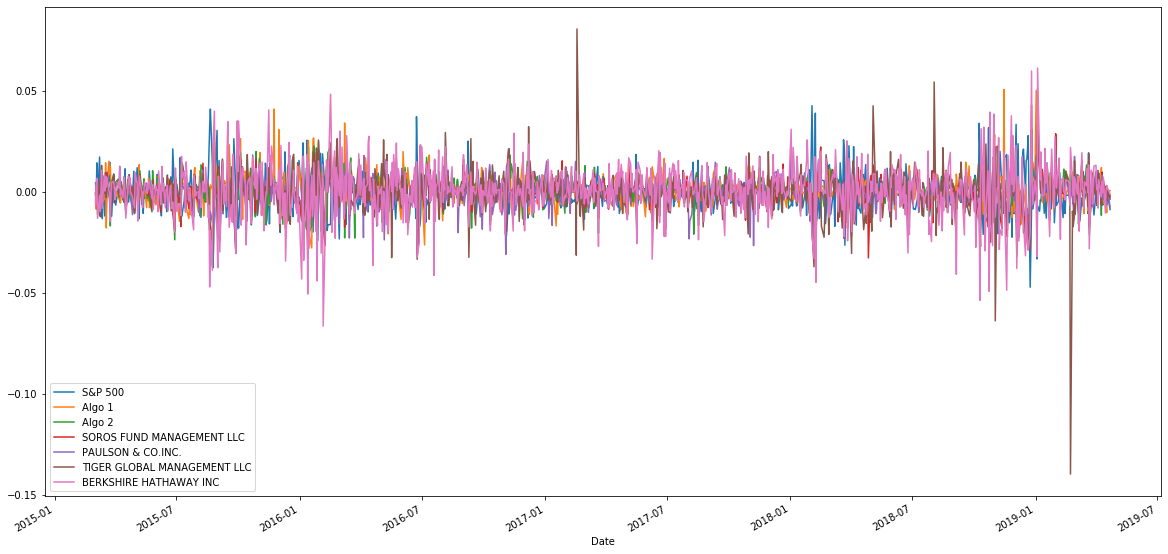

In [18]:
# Plot daily returns
# YOUR CODE HERE
daily_returns = group_dataframe.plot(figsize=(20,10))

In [19]:
daily_returns

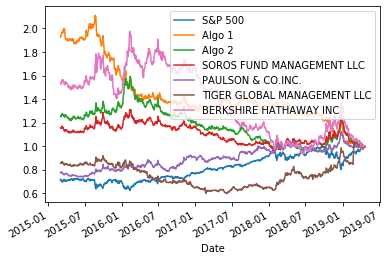

In [20]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + group_dataframe).cumprod()
cumulative_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

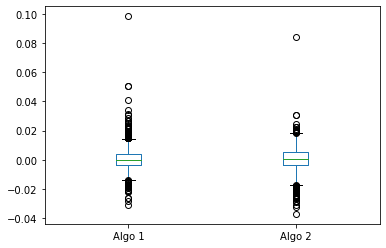

In [21]:
# Box plot to visually show risk
# YOUR CODE HERE
#box plot algo_df
algo_df.plot.box()

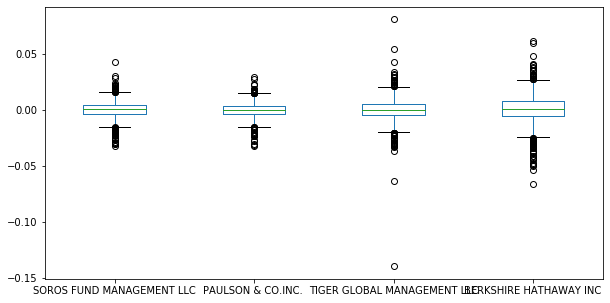

In [22]:
#box plot whale_df
whale_df.plot.box(figsize=(10,5))

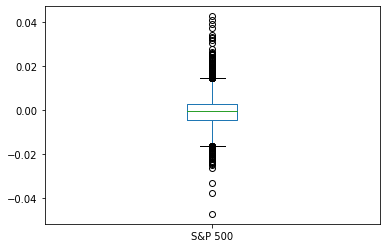

In [23]:
sp500_daily_returns.plot.box()

In [26]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
x=0
group_std= group_dataframe.std()
group_std= group_std.sort_values(ascending=False)
group_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

Bershire and Tiger Global have a higher standard deviation than the s&p500.

In [180]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
risk = True
fund =['S&P 500','Algo','Algo 2','SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']
for x in range(0,7):
    if group_std[0] == group_std[x]: 
        risk = False
        print(f'{fund[x]} {risk}')
    elif group_std[0] <= group_std[x]:
        risk = True
        print(f'{fund[x]} {risk}')
    elif group_std[0] >= group_std[x]:
        risk = False
        print(f'{fund[x]} {risk}')
    
    
    

S&P 500 False
Algo False
Algo 2 False
SOROS FUND MANAGEMENT LLC False
PAULSON & CO.INC. False
TIGER GLOBAL MANAGEMENT LLC True
BERKSHIRE HATHAWAY INC True


In [181]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = group_std*np.sqrt(252)
annualized_std

S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

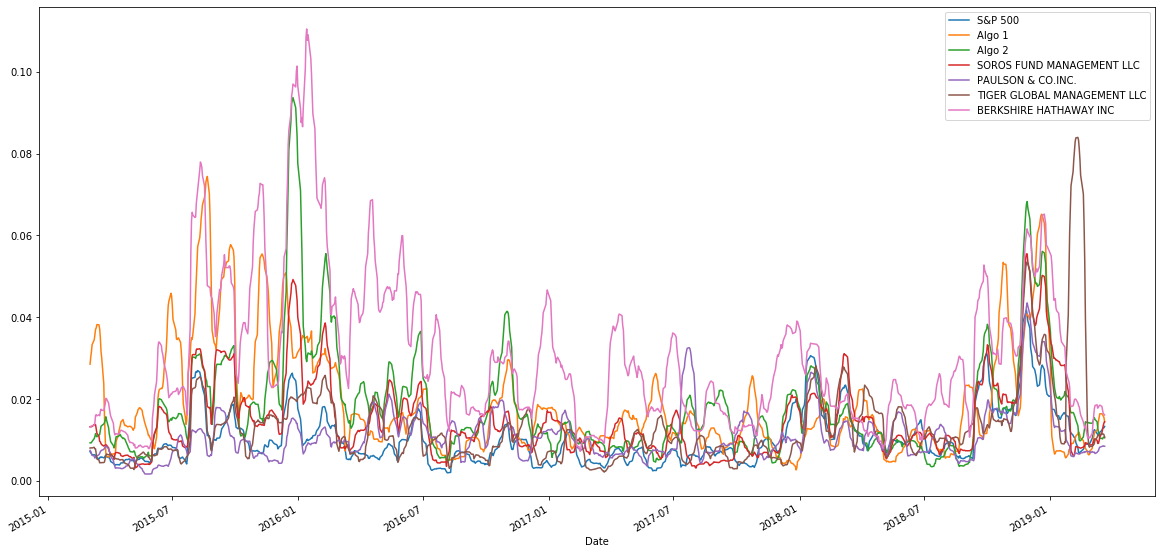

In [182]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
cumulative_returns.rolling(window=21).std().plot(figsize=(20,10))

In [183]:
# Construct a correlation table
# YOUR CODE HERE
correlation = cumulative_returns.corr()
correlation

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,-0.712592,-0.949035,-0.869839,0.865808,-0.110207,-0.932323
Algo 1,-0.712592,1.000000,0.549443,0.459082,-0.824056,0.192433,0.527272
Algo 2,-0.949035,0.549443,1.000000,0.926730,-0.761061,0.194619,0.928513
SOROS FUND MANAGEMENT LLC,-0.869839,0.459082,0.926730,1.000000,-0.647206,0.303007,0.916884
PAULSON & CO.INC.,0.865808,-0.824056,-0.761061,-0.647206,1.000000,-0.113007,-0.787723
TIGER GLOBAL MANAGEMENT LLC,-0.110207,0.192433,0.194619,0.303007,-0.113007,1.000000,0.043875
BERKSHIRE HATHAWAY INC,-0.932323,0.527272,0.928513,0.916884,-0.787723,0.043875,1.000000


In [184]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE: beta = covariance/variance must calculate all three from group_dataframe
tiger_covariance= group_dataframe['TIGER GLOBAL MANAGEMENT LLC'].cov(group_dataframe['S&P 500'])
variance= group_dataframe['S&P 500'].var()
beta = tiger_covariance/variance
beta

-0.0019097027512372687

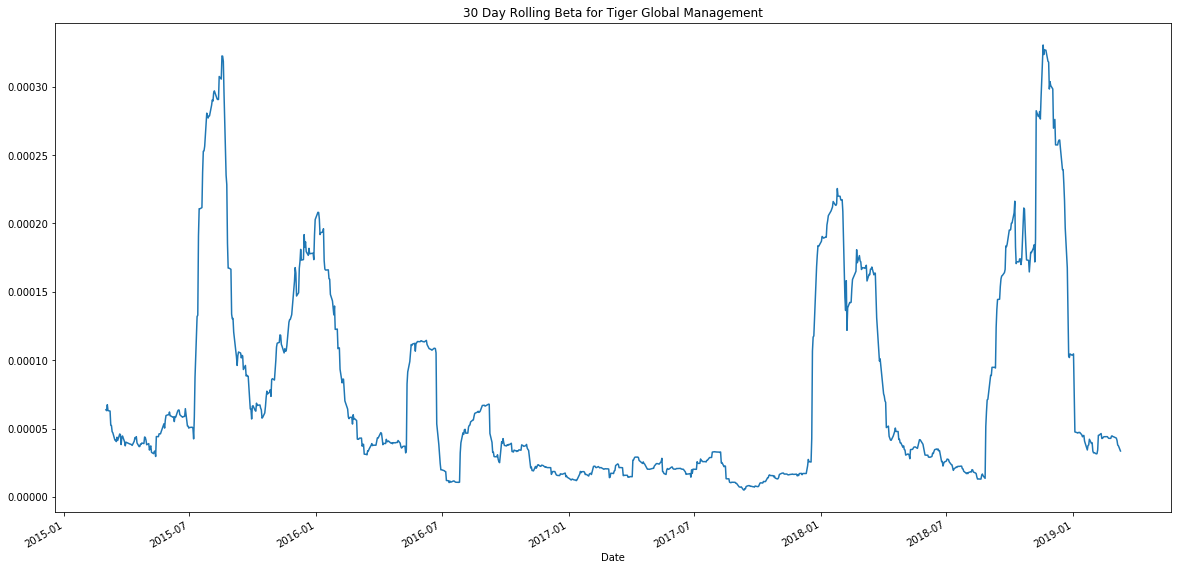

In [185]:
#rolling Beta
rolling_covariance = group_dataframe['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(group_dataframe['S&P 500'])
rolling_variance = group_dataframe['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20,10), title = '30 Day Rolling Beta for Tiger Global Management')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [186]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [187]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (group_dataframe.mean()*252)/(group_dataframe.std()*np.sqrt(252))
sharpe_ratios

S&P 500                       -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

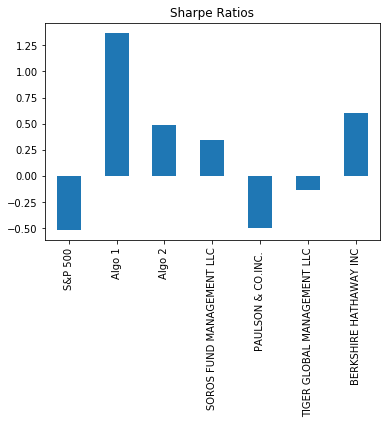

In [188]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [189]:
# Read the first stock
# YOUR CODE HERE
import pandas as pd
from pathlib import Path
t_csv = Path("../Starter_Code/Resources/panda _T.csv")
t_df =pd.read_csv(t_csv,index_col = 'Date', parse_dates = True,infer_datetime_format=True)
t_df = t_df.rename(columns={'Close' :'Verizon'})
t_df



,Verizon
Date,
2015-03-02 16:00:00,34.64
2015-03-03 16:00:00,34.41
2015-03-04 16:00:00,34.00
2015-03-05 16:00:00,34.00
2015-03-06 16:00:00,33.48
...,...
2020-02-24 16:00:00,38.05
2020-02-25 16:00:00,37.35
2020-02-26 16:00:00,37.10


In [190]:
# Read the second stock
# YOUR CODE HERE
pg_csv = Path("../Starter_Code/Resources/panda _PG.csv")
pg_df =pd.read_csv(t_csv,index_col='Date',parse_dates = True,infer_datetime_format=True)
pg_df = pg_df.rename(columns={'Close' :'Proctor & Gamble'})
pg_df.tail()

,Proctor & Gamble
Date,
2020-02-24 16:00:00,38.05
2020-02-25 16:00:00,37.35
2020-02-26 16:00:00,37.10
2020-02-27 16:00:00,35.73
2020-02-28 16:00:00,35.22


In [191]:
# Read the third stock
# YOUR CODE HERE
vz_csv = Path("../Starter_Code/Resources/panda_vz.csv")
vz_df =pd.read_csv(vz_csv,index_col= 'Date', parse_dates = True,infer_datetime_format=True)
vz_df = vz_df.rename(columns={'Close' :'Verizon'})
vz_df.head()

,Verizon
Date,
2015-03-02 16:00:00,49.47
2015-03-03 16:00:00,49.55
2015-03-04 16:00:00,49.07
2015-03-05 16:00:00,48.92
2015-03-06 16:00:00,48.29


In [192]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
portfolio_df = pd.concat([t_df, pg_df, vz_df], axis ='columns', join = 'inner')

#portfolio_return = portfolio_df.pct_change()
portfolio_df

,Verizon,Proctor & Gamble,Verizon
Date,,,
2015-03-02 16:00:00,34.64,34.64,49.47
2015-03-03 16:00:00,34.41,34.41,49.55
2015-03-04 16:00:00,34.00,34.00,49.07
2015-03-05 16:00:00,34.00,34.00,48.92
2015-03-06 16:00:00,33.48,33.48,48.29
...,...,...,...
2020-02-24 16:00:00,38.05,38.05,57.99
2020-02-25 16:00:00,37.35,37.35,57.12
2020-02-26 16:00:00,37.10,37.10,57.14


In [193]:
# Reset the index
# YOUR CODE HERE

new_p =portfolio_df.reset_index()
new_p['Date']=pd.to_datetime(new_p['Date']).dt.date

new_p.tail()

,Date,Verizon,Proctor & Gamble,Verizon
1253,2020-02-24,38.05,38.05,57.99
1254,2020-02-25,37.35,37.35,57.12
1255,2020-02-26,37.10,37.10,57.14
1256,2020-02-27,35.73,35.73,55.06
1257,2020-02-28,35.22,35.22,54.16


In [194]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE:n/a
new_p.set_index(new_p['Date'], inplace= True)
new_p.head()

,Date,Verizon,Proctor & Gamble,Verizon
Date,,,,
2015-03-02,2015-03-02,34.64,34.64,49.47
2015-03-03,2015-03-03,34.41,34.41,49.55
2015-03-04,2015-03-04,34.00,34.00,49.07
2015-03-05,2015-03-05,34.00,34.00,48.92
2015-03-06,2015-03-06,33.48,33.48,48.29


In [195]:
# Drop Nulls
# YOUR CODE HERE
new_p.isnull().sum()
new_p.dropna(inplace=True)
new_p.drop(columns=['Date'], inplace=True)
new_p_returns=new_p.pct_change()
new_p_returns

,Verizon,Proctor & Gamble,Verizon
Date,,,
2015-03-02,NaN,NaN,NaN
2015-03-03,-0.006640,-0.006640,0.001617
2015-03-04,-0.011915,-0.011915,-0.009687
2015-03-05,0.000000,0.000000,-0.003057
2015-03-06,-0.015294,-0.015294,-0.012878
...,...,...,...
2020-02-24,-0.012970,-0.012970,-0.003608
2020-02-25,-0.018397,-0.018397,-0.015003
2020-02-26,-0.006693,-0.006693,0.000350


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [196]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_returns= new_p_returns.dot(weights)
weighted_returns

Date
2015-03-02         NaN
2015-03-03   -0.003887
2015-03-04   -0.011172
2015-03-05   -0.001019
2015-03-06   -0.014489
                ...   
2020-02-24   -0.009850
2020-02-25   -0.017265
2020-02-26   -0.004346
2020-02-27   -0.036752
2020-02-28   -0.014964
Length: 1258, dtype: float64

In [197]:
#had problems when concating data, Nan returned in column for custom portfolio.  Saved file as csv and then concatted, problem solved.
weighted_returns.to_csv('weighted_returns.csv')
csvpath= Path('../Starter_Code/weighted_returns.csv')
panda_port= pd.read_csv(csvpath,index_col='Date', parse_dates = True, infer_datetime_format=True)
panda_port.columns=['Panda Portfolio']
panda_port

,Panda Portfolio
Date,
2015-03-02,NaN
2015-03-03,-0.003887
2015-03-04,-0.011172
2015-03-05,-0.001019
2015-03-06,-0.014489
...,...
2020-02-24,-0.009850
2020-02-25,-0.017265
2020-02-26,-0.004346


In [198]:
#check to see current output and date range
group_dataframe

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [199]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

new_port = pd.concat([panda_port, group_dataframe],axis= 'columns',join = 'inner')
new_port

,Panda Portfolio,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2015-03-03,-0.003887,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.011172,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.001019,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014489,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.003003,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...,...
2019-04-15,-0.003897,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.005243,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.011928,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


In [200]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE, previous code, data that did not match dropped off?
new_port.isnull().sum()

Panda Portfolio                0
S&P 500                        0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

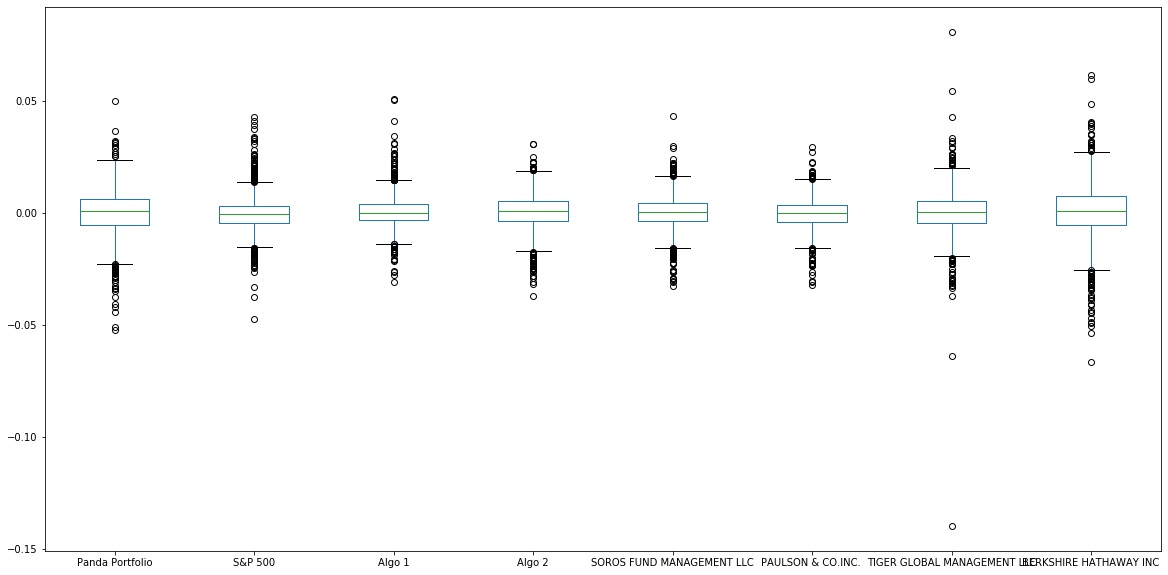

In [201]:
# Risk
# YOUR CODE HERE
#create a box plot for panda portfolio.

new_port.plot.box(figsize=(20,10))




In [202]:
#Calculate the standard deviation for panda portfolios
new_port.std()

Panda Portfolio                0.010571
S&P 500                        0.008589
Algo 1                         0.007612
Algo 2                         0.008345
SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007028
TIGER GLOBAL MANAGEMENT LLC    0.010901
BERKSHIRE HATHAWAY INC         0.012914
dtype: float64

In [203]:
#Calculate the Annualized Standard Deviation of panda portfolio
annualized_panda = panda_port*np.sqrt(252)
annualized_panda.head()

,Panda Portfolio
Date,
2015-03-02,NaN
2015-03-03,-0.061711
2015-03-04,-0.177358
2015-03-05,-0.016175
2015-03-06,-0.230003


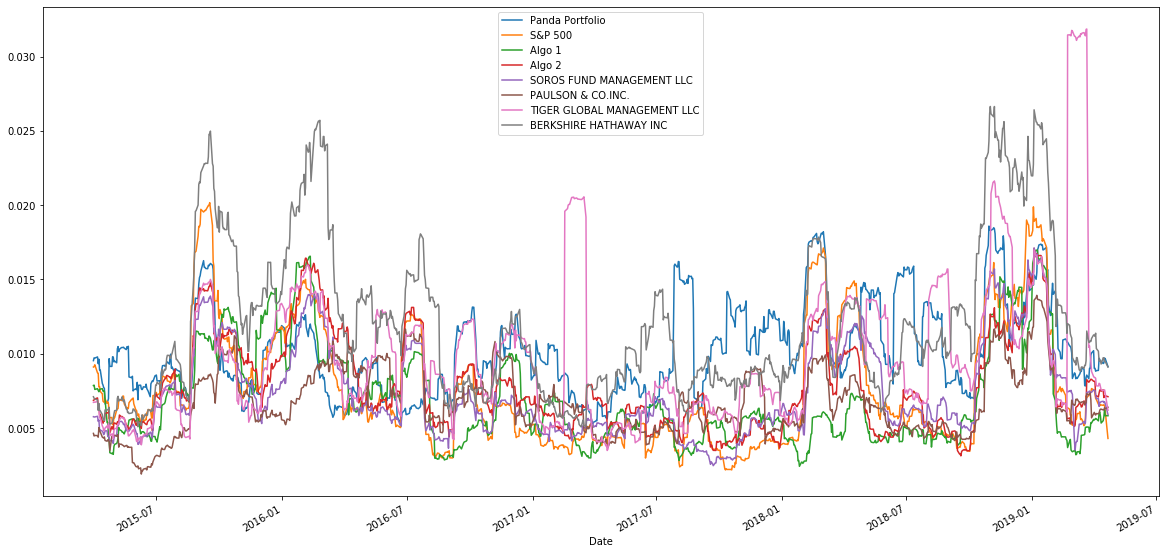

In [204]:
# Rolling
new_port.rolling(window=21).std().plot(figsize=(20,10))

In [205]:
# Beta
# YOUR CODE HERE
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE: beta = covariance/variance must calculate all three from group_dataframe
panda_covariance= new_port['Panda Portfolio'].cov(new_port['S&P 500'])
variance= new_port['S&P 500'].var()
new_beta = tiger_covariance/variance
new_beta



-0.0019089800386152332

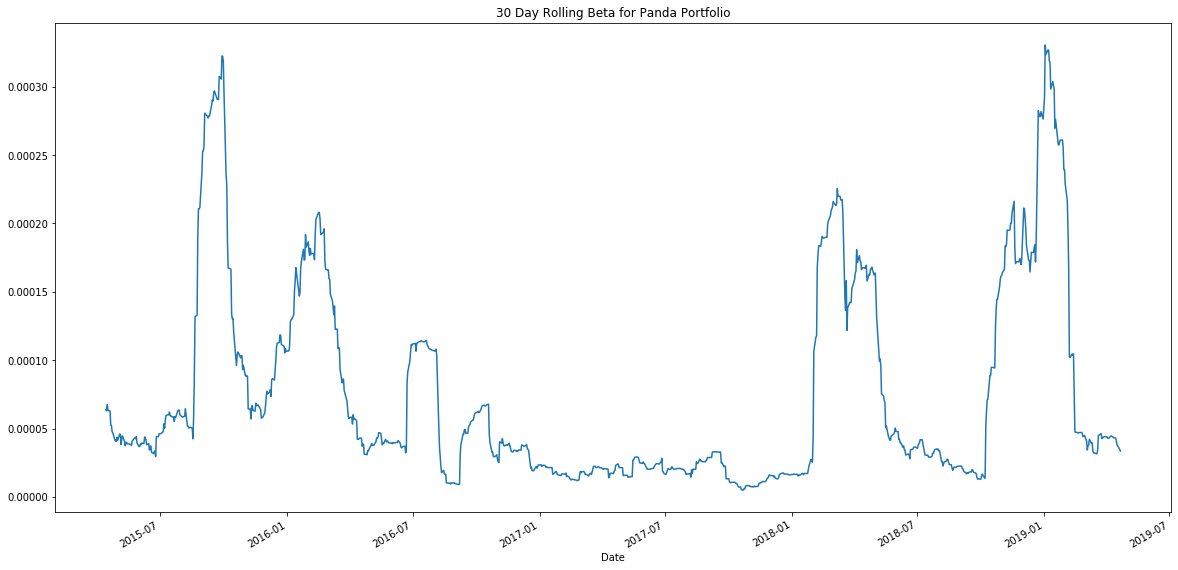

In [206]:
#rolling Beta
rolling_covariance = new_port['Panda Portfolio'].rolling(window=30).cov(new_port['S&P 500'])
rolling_variance = new_port['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20,10), title = '30 Day Rolling Beta for Panda Portfolio')

In [207]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
new_sharpe_ratios = (new_port.mean()*252)/(new_port.std()*np.sqrt(252))
new_sharpe_ratios

Panda Portfolio                0.105588
S&P 500                       -0.530350
Algo 1                         1.401451
Algo 2                         0.489736
SOROS FUND MANAGEMENT LLC      0.343402
PAULSON & CO.INC.             -0.496792
TIGER GLOBAL MANAGEMENT LLC   -0.122600
BERKSHIRE HATHAWAY INC         0.587034
dtype: float64

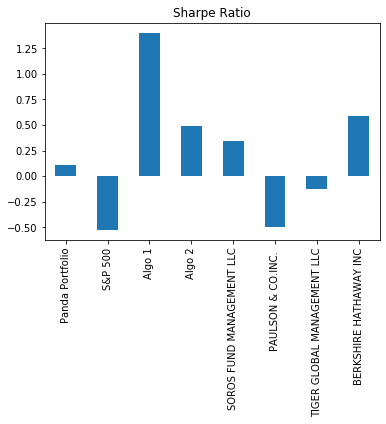

In [208]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
new_sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

## Include correlation analysis to determine which stocks (if any) are correlated

In [209]:
# YOUR CODE HERE new_por

correlation = new_port.corr()
correlation

,Panda Portfolio,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Panda Portfolio,1.000000,0.049704,0.115461,0.391571,0.391177,0.326744,0.401989,0.234108
S&P 500,0.049704,1.000000,-0.032564,-0.001918,0.000607,0.013280,-0.001135,-0.014850
Algo 1,0.115461,-0.032564,1.000000,0.287710,0.321414,0.269839,0.163503,0.294931
Algo 2,0.391571,-0.001918,0.287710,1.000000,0.826768,0.678302,0.507078,0.688826
SOROS FUND MANAGEMENT LLC,0.391177,0.000607,0.321414,0.826768,1.000000,0.699884,0.561086,0.754832
PAULSON & CO.INC.,0.326744,0.013280,0.269839,0.678302,0.699884,1.000000,0.434561,0.545475
TIGER GLOBAL MANAGEMENT LLC,0.401989,-0.001135,0.163503,0.507078,0.561086,0.434561,1.000000,0.425144
BERKSHIRE HATHAWAY INC,0.234108,-0.014850,0.294931,0.688826,0.754832,0.545475,0.425144,1.000000


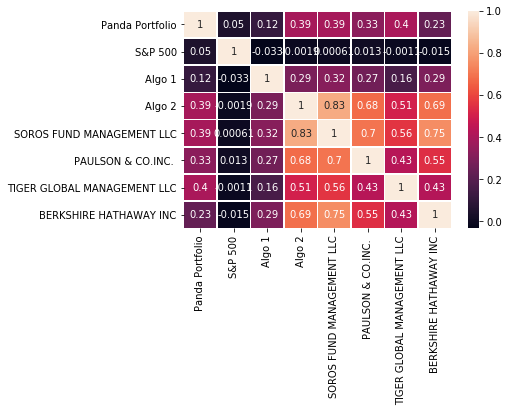

In [216]:
#plot correlations with heatmap

sns.heatmap(correlation,annot=True, linewidth = 0.5)

The panda portfolio did not seem to fair all that well compared to the top performers. 